In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import math
import random
import datetime as dt
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error



Import Data

In [2]:
df = pd.read_csv('C:/Users/yolau/OneDrive/Documents/TA/Kodingan/INCO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,2900.0,2950.0,2880.0,2900.0,2834.681641,8315300.0
1,2017-12-19,2940.0,2940.0,2890.0,2920.0,2854.230957,4371500.0
2,2017-12-20,2900.0,2900.0,2830.0,2850.0,2785.807617,10485500.0
3,2017-12-21,2870.0,2890.0,2840.0,2840.0,2776.032959,5395600.0
4,2017-12-22,2840.0,2850.0,2790.0,2800.0,2736.934082,4185500.0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1489,2023-12-08,4310.0,4430.0,4310.0,4360.0,4360.0,21184500.0
1490,2023-12-11,4360.0,4370.0,4190.0,4190.0,4190.0,23613000.0
1491,2023-12-12,4200.0,4250.0,4180.0,4220.0,4220.0,9989200.0
1492,2023-12-13,4220.0,4230.0,4010.0,4020.0,4020.0,25006200.0
1493,2023-12-14,4030.0,4220.0,4030.0,4170.0,4170.0,24832800.0


In [4]:
print("Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?\nAnswer:", df.isnull().sum().values.any())

Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?
Answer: True


In [5]:
# Menghitung jumlah nilai yang hilang per kolom
missing_values_count = df.isna().sum()

# Menampilkan jumlah nilai yang hilang
print(missing_values_count)

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [6]:
df = df.dropna()

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,2900.0,2950.0,2880.0,2900.0,2834.681641,8315300.0
1,2017-12-19,2940.0,2940.0,2890.0,2920.0,2854.230957,4371500.0
2,2017-12-20,2900.0,2900.0,2830.0,2850.0,2785.807617,10485500.0
3,2017-12-21,2870.0,2890.0,2840.0,2840.0,2776.032959,5395600.0
4,2017-12-22,2840.0,2850.0,2790.0,2800.0,2736.934082,4185500.0
...,...,...,...,...,...,...,...
1489,2023-12-08,4310.0,4430.0,4310.0,4360.0,4360.000000,21184500.0
1490,2023-12-11,4360.0,4370.0,4190.0,4190.0,4190.000000,23613000.0
1491,2023-12-12,4200.0,4250.0,4180.0,4220.0,4220.000000,9989200.0
1492,2023-12-13,4220.0,4230.0,4010.0,4020.0,4020.000000,25006200.0


In [8]:
specific_df = df[['Date', 'Close', 'Open', 'High', 'Low']]

In [9]:
specific_df

,Date,Close,Open,High,Low
0,2017-12-18,2900.0,2900.0,2950.0,2880.0
1,2017-12-19,2920.0,2940.0,2940.0,2890.0
2,2017-12-20,2850.0,2900.0,2900.0,2830.0
3,2017-12-21,2840.0,2870.0,2890.0,2840.0
4,2017-12-22,2800.0,2840.0,2850.0,2790.0
...,...,...,...,...,...
1489,2023-12-08,4360.0,4310.0,4430.0,4310.0
1490,2023-12-11,4190.0,4360.0,4370.0,4190.0
1491,2023-12-12,4220.0,4200.0,4250.0,4180.0
1492,2023-12-13,4020.0,4220.0,4230.0,4010.0


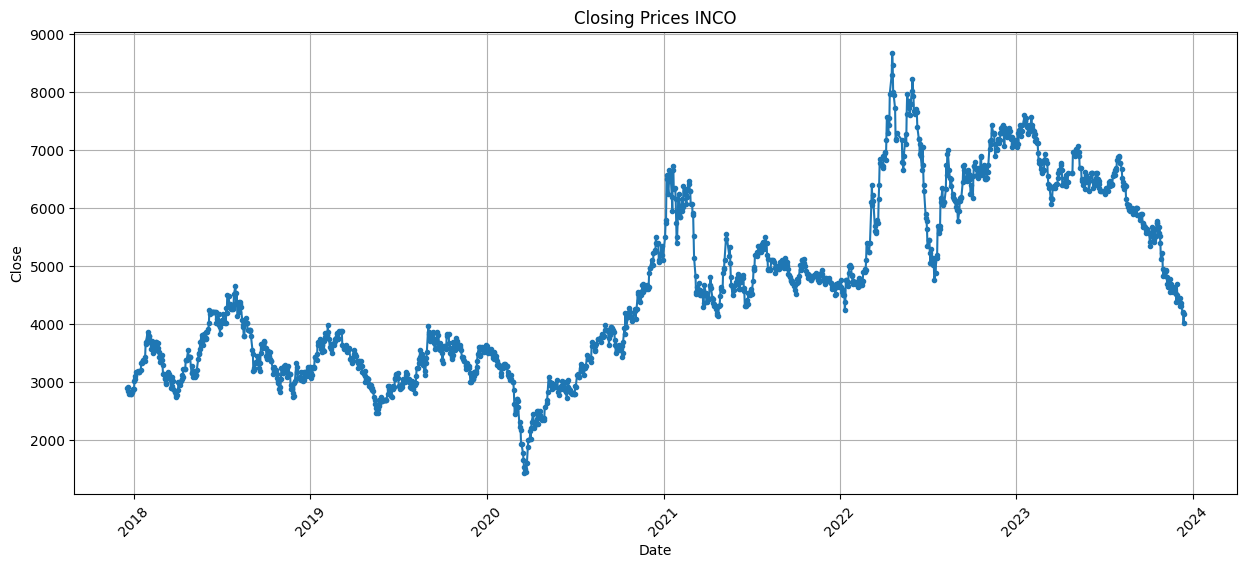

In [10]:
specific_df['Date'] = pd.to_datetime(specific_df['Date'])

plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], marker='.')
plt.title('Closing Prices INCO')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

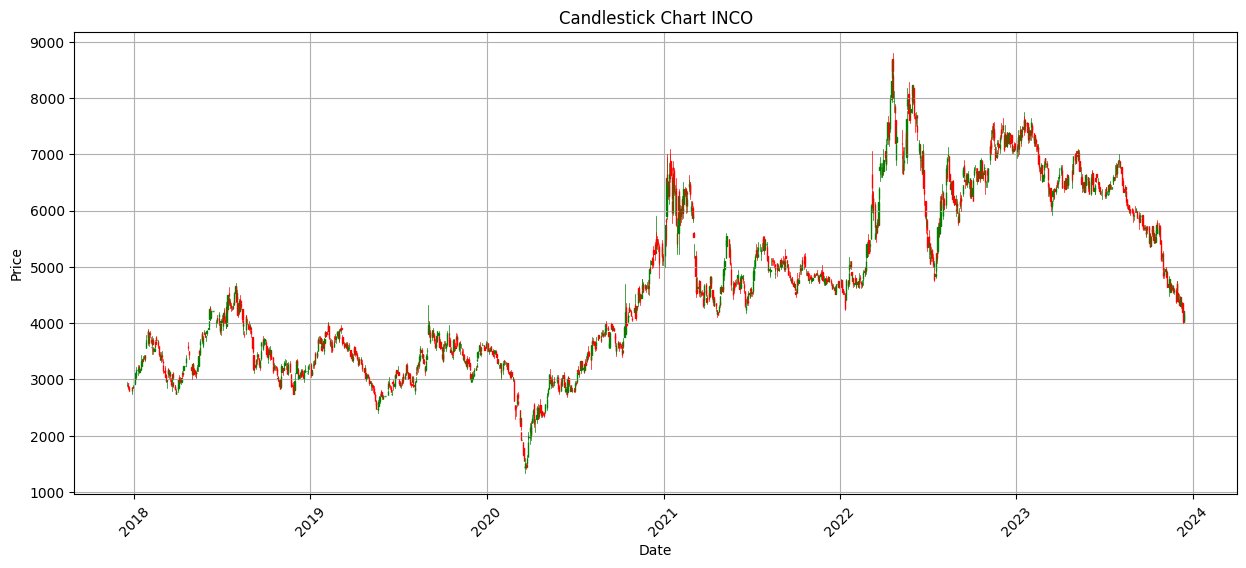

In [11]:
matplotlib_date = mdates.date2num(specific_df['Date'])

ohlc = np.vstack((matplotlib_date, specific_df['Open'], specific_df['High'], specific_df['Low'], specific_df['Close'])).T

plt.figure(figsize=(15,6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart INCO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

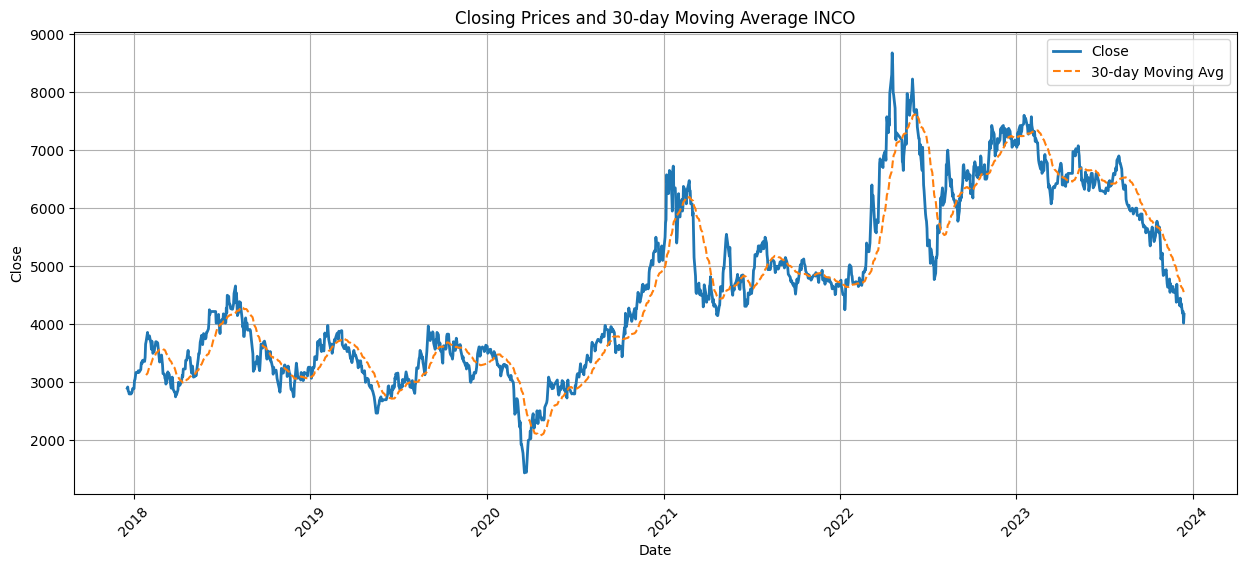

In [12]:
window = 30
plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], label='Close', linewidth=2)
plt.plot(specific_df['Date'], specific_df['Close'].rolling(window=window).mean(),label=f'{window}-day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-day Moving Average INCO')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
specific_df.head()

,Date,Close,Open,High,Low
0,2017-12-18,2900.0,2900.0,2950.0,2880.0
1,2017-12-19,2920.0,2940.0,2940.0,2890.0
2,2017-12-20,2850.0,2900.0,2900.0,2830.0
3,2017-12-21,2840.0,2870.0,2890.0,2840.0
4,2017-12-22,2800.0,2840.0,2850.0,2790.0


In [14]:
new_df = specific_df.reset_index()['Close']

In [15]:
new_df

0       2900.0
1       2920.0
2       2850.0
3       2840.0
4       2800.0
         ...  
1488    4360.0
1489    4190.0
1490    4220.0
1491    4020.0
1492    4170.0
Name: Close, Length: 1493, dtype: float64

In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(new_df).reshape(-1,1))

Partisi Data

In [17]:
train_size = int(len(scaled_data)*0.8) #80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [18]:
n_past = 60

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [19]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1134, 60)
(1134,)


Testing set size:-
(239, 60)
(239,)


(None, None)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

LAyer = 3

dropout =  0.6

In [21]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.6))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(units=50))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [23]:
model.compile(loss='mean_squared_error',optimizer='adam')

epoch = 125

batchsize = 8

In [24]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=8,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125

142/142 [==============================] - 15s 55ms/step - loss: 0.0203 - val_loss: 0.0388
Epoch 2/125
142/142 [==============================] - 6s 43ms/step - loss: 0.0107 - val_loss: 0.0035
Epoch 3/125
142/142 [==============================] - 7s 46ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 4/125
142/142 [==============================] - 6s 44ms/step - loss: 0.0080 - val_loss: 0.0013
Epoch 5/125
142/142 [==============================] - 7s 49ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 6/125
142/142 [==============================] - 6s 45ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 7/125
142/142 [==============================] - 6s 41ms/step - loss: 0.0054 - val_loss: 0.0025
Epoch 8/125
142/142 [==============================] - 6s 39ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 9/125
142/142 [==============================] - 6s 42ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 10/125
142/142 [==============================] - 6s 46ms/step - loss: 0.0

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 20ms/step


In [26]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [27]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.025149110084704263
0.018278433734002005


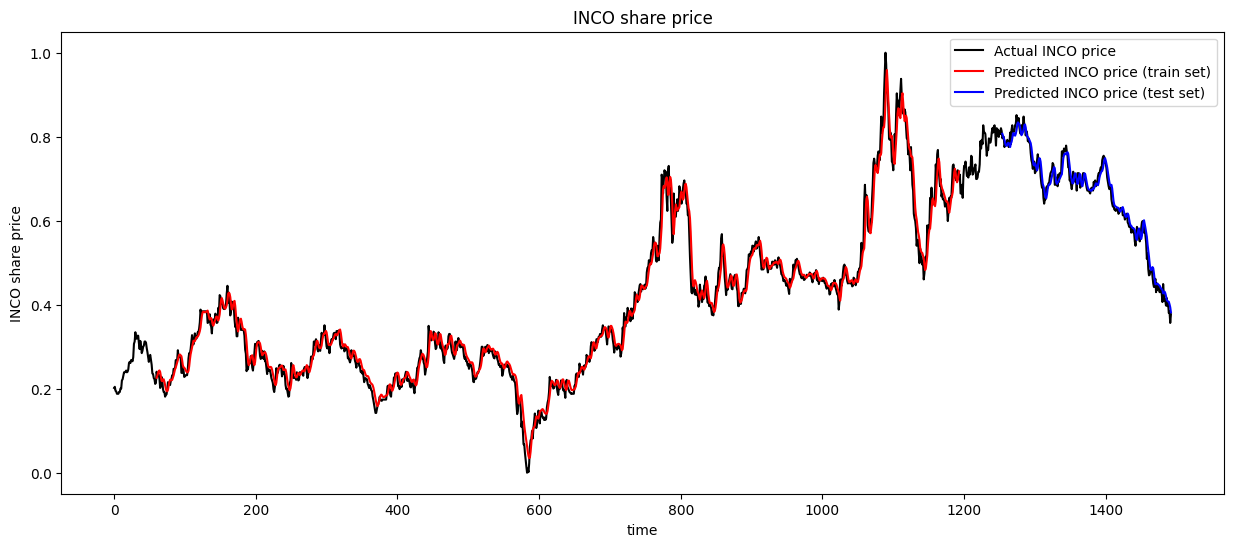

In [28]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [29]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 48ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4203.40673828125
Day 2: Predicted Price = 4163.3466796875
Day 3: Predicted Price = 4166.166015625
Day 4: Predicted Price = 4188.27001953125
Day 5: Predicted Price = 4211.79931640625
Day 6: Predicted Price = 4229.19384765625
Day 7: Predicted Price = 4239.953125
Day 8: Predicted Price = 4246.43408203125
Day 9: Predicted Price = 4251.15625
Day 10: Predicted Price = 4255.748046875
Day 11: Predicted Price = 4260.89501953125
Day 12: Predicted Price = 4266.673828125
Day 13: Predicted Price = 4272.89990234375
Day 14: Predicted Price = 4279.35400390625
Day 15: Predicted Price = 4285.8779296875
Day 16: Predicted Price = 4292.3896484375
Day 17: Predicted Price = 4298.86181640625
Day 18: Predicted Price = 4305.29541015625
Day 19: Predicted Price = 4311.69873046875
Day 20: Predicted Price = 4318.080078125
Day 21: Predicted Price = 4324.4443359375
Day 22: Predicted Price = 4330.79296875
Day

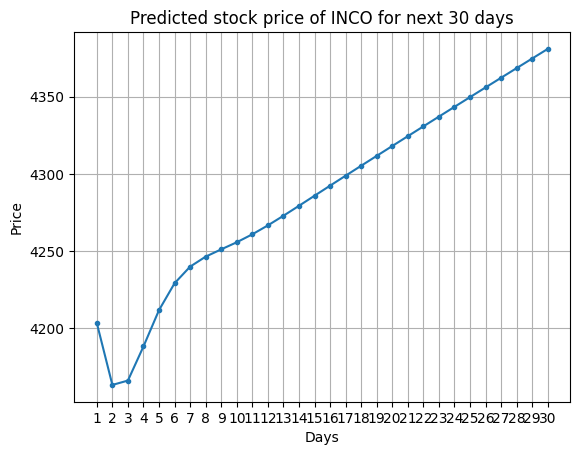

In [30]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [31]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 20ms/step - loss: 3.3410e-04
Validation Loss: 0.00033410111791454256
Validation MSE Loss: 0.00033410111791454256


In [32]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.025149110084704263
Testing RMSE: 0.018278433734002005


batchsize = 16

In [33]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=16,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
71/71 [==============================] - 4s 51ms/step - loss: 0.0021 - val_loss: 3.6811e-04
Epoch 2/125
71/71 [==============================] - 4s 50ms/step - loss: 0.0021 - val_loss: 4.3796e-04
Epoch 3/125
71/71 [==============================] - 4s 49ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 4/125
71/71 [==============================] - 4s 50ms/step - loss: 0.0020 - val_loss: 5.2372e-04
Epoch 5/125
71/71 [==============================] - 3s 49ms/step - loss: 0.0021 - val_loss: 3.8412e-04
Epoch 6/125
71/71 [==============================] - 3s 49ms/step - loss: 0.0018 - val_loss: 7.7920e-04
Epoch 7/125
71/71 [==============================] - 3s 49ms/step - loss: 0.0021 - val_loss: 7.7393e-04
Epoch 8/125
71/71 [==============================] - 4s 52ms/step - loss: 0.0021 - val_loss: 3.9055e-04
Epoch 9/125
71/71 [==============================] - 4s 53ms/step - loss: 0.0020 - val_loss: 5.1080e-04
Epoch 10/125
71/71 [==============================] - 4s 50ms/step -

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 20ms/step


In [35]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [36]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.028678443459237517
0.017006599248401793


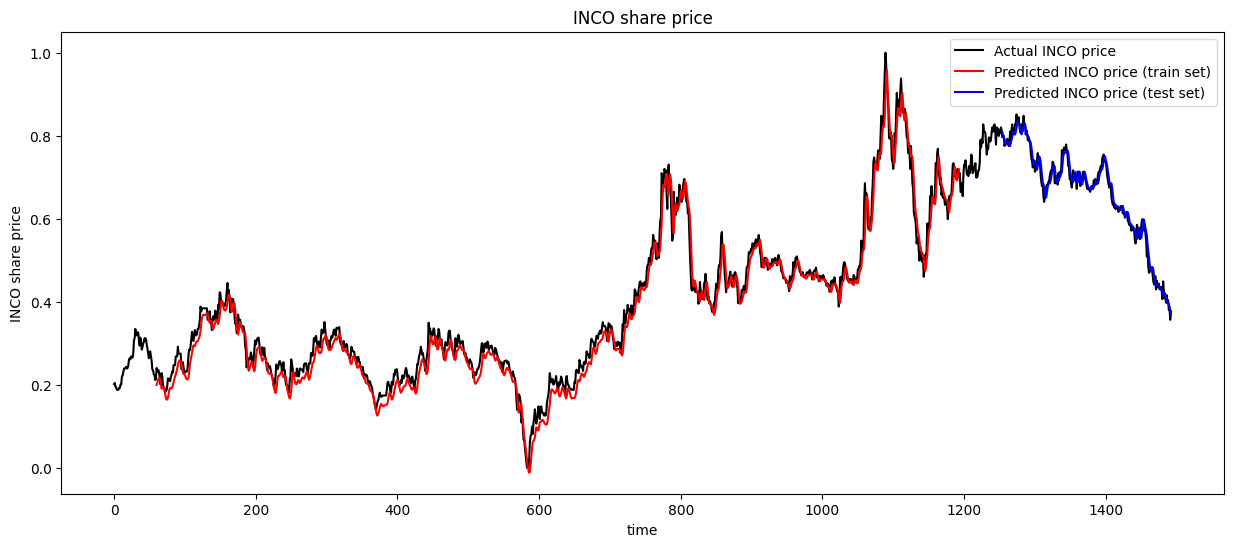

In [37]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [38]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 16ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4095.639404296875
Day 2: Predicted Price = 4029.939208984375
Day 3: Predicted Price = 3990.75341796875
Day 4: Predicted Price = 3962.319580078125
Day 5: Predicted Price = 3933.77880859375
Day 6: Predicted Price = 3901.104736328125
Day 7: Predicted Price = 3864.3330078125
Day 8: Predicted Price = 3824.809814453125
Day 9: Predicted Price = 3783.727783203125
Day 10: Predicted Price = 3741.7236328125
Day 11: Predicted Price = 3698.986572265625
Day 12: Predicted Price = 3655.480224609375
Day 13: Predicted Price = 3611.11083984375
Day 14: Predicted Price = 3565.803955078125
Day 15: Predicted Price = 3519.520751953125
Day 16: Predicted Price = 3472.2490234375
Day 17: Predicted Price = 3423.98876953125
Day 18: Predicted Price = 3374.743896484375
Day 19: Predicted Price = 3324.518798828125
Day 20: Predicted Price = 3273.31787109375
Day 21: Predicted Price = 3221.147705078125
Day 22: Pr

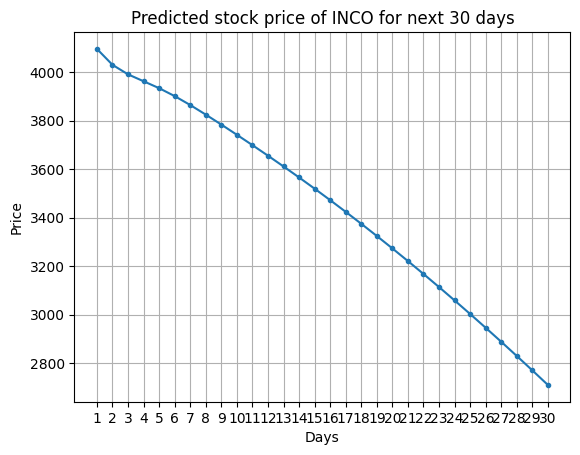

In [39]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [40]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 21ms/step - loss: 2.8922e-04
Validation Loss: 0.00028922443743795156
Validation MSE Loss: 0.00028922443743795156


In [41]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.028678443459237517
Testing RMSE: 0.017006599248401793


batchsize = 32

In [42]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
36/36 [==============================] - 2s 60ms/step - loss: 0.0020 - val_loss: 6.2190e-04
Epoch 2/125
36/36 [==============================] - 2s 58ms/step - loss: 0.0019 - val_loss: 9.5859e-04
Epoch 3/125
36/36 [==============================] - 2s 60ms/step - loss: 0.0017 - val_loss: 3.3522e-04
Epoch 4/125
36/36 [==============================] - 2s 62ms/step - loss: 0.0017 - val_loss: 5.0778e-04
Epoch 5/125
36/36 [==============================] - 2s 63ms/step - loss: 0.0020 - val_loss: 3.8374e-04
Epoch 6/125
36/36 [==============================] - 2s 58ms/step - loss: 0.0018 - val_loss: 9.6418e-04
Epoch 7/125
36/36 [==============================] - 2s 57ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 8/125
36/36 [==============================] - 2s 58ms/step - loss: 0.0020 - val_loss: 2.9263e-04
Epoch 9/125
36/36 [==============================] - 2s 61ms/step - loss: 0.0020 - val_loss: 5.7536e-04
Epoch 10/125
36/36 [==============================] - 2s 66ms/step -

In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 19ms/step


In [44]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [45]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.023536288993014964
0.017106532485854975


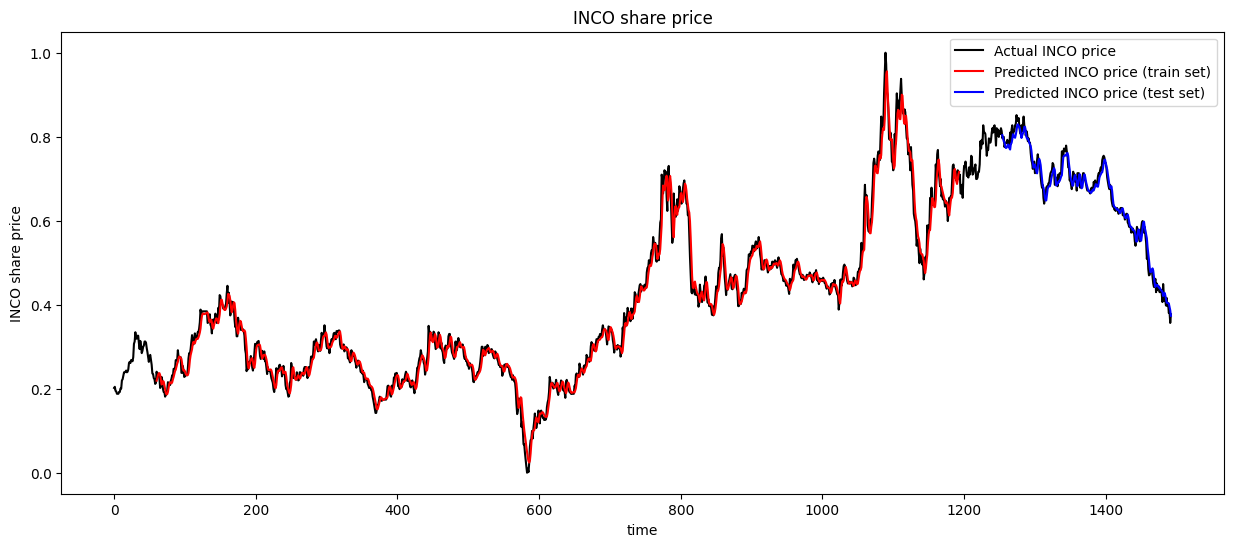

In [46]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [47]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 32ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4143.43896484375
Day 2: Predicted Price = 4099.18017578125
Day 3: Predicted Price = 4093.916748046875
Day 4: Predicted Price = 4102.2490234375
Day 5: Predicted Price = 4109.07080078125
Day 6: Predicted Price = 4109.97998046875
Day 7: Predicted Price = 4106.06201171875
Day 8: Predicted Price = 4099.68408203125
Day 9: Predicted Price = 4092.59228515625
Day 10: Predicted Price = 4085.58935546875
Day 11: Predicted Price = 4078.84521484375
Day 12: Predicted Price = 4072.270263671875
Day 13: Predicted Price = 4065.742431640625
Day 14: Predicted Price = 4059.19287109375
Day 15: Predicted Price = 4052.6025390625
Day 16: Predicted Price = 4045.983154296875
Day 17: Predicted Price = 4039.3505859375
Day 18: Predicted Price = 4032.718994140625
Day 19: Predicted Price = 4026.09521484375
Day 20: Predicted Price = 4019.481689453125
Day 21: Predicted Price = 4012.87890625
Day 22: Predicted Pr

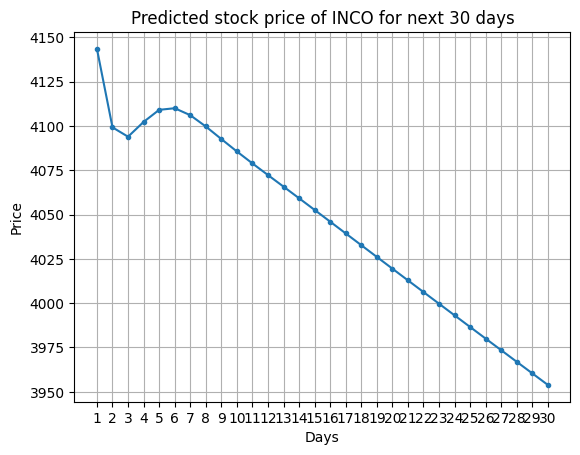

In [48]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [49]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 22ms/step - loss: 2.9263e-04
Validation Loss: 0.0002926334273070097
Validation MSE Loss: 0.0002926334273070097


In [50]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.023536288993014964
Testing RMSE: 0.017106532485854975


batchsize = 64

In [51]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=64,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
18/18 [==============================] - 2s 88ms/step - loss: 0.0018 - val_loss: 3.7740e-04
Epoch 2/125
18/18 [==============================] - 2s 85ms/step - loss: 0.0018 - val_loss: 3.2778e-04
Epoch 3/125
18/18 [==============================] - 1s 81ms/step - loss: 0.0019 - val_loss: 3.2229e-04
Epoch 4/125
18/18 [==============================] - 1s 83ms/step - loss: 0.0018 - val_loss: 4.2782e-04
Epoch 5/125
18/18 [==============================] - 1s 78ms/step - loss: 0.0018 - val_loss: 3.3772e-04
Epoch 6/125
18/18 [==============================] - 2s 88ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 7/125
18/18 [==============================] - 2s 83ms/step - loss: 0.0018 - val_loss: 3.4870e-04
Epoch 8/125
18/18 [==============================] - 1s 76ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 9/125
18/18 [==============================] - 1s 76ms/step - loss: 0.0018 - val_loss: 6.5881e-04
Epoch 10/125
18/18 [==============================] - 15s 896ms/step - l

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 21ms/step


In [53]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [54]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.02348389437293068
0.01727922245215159


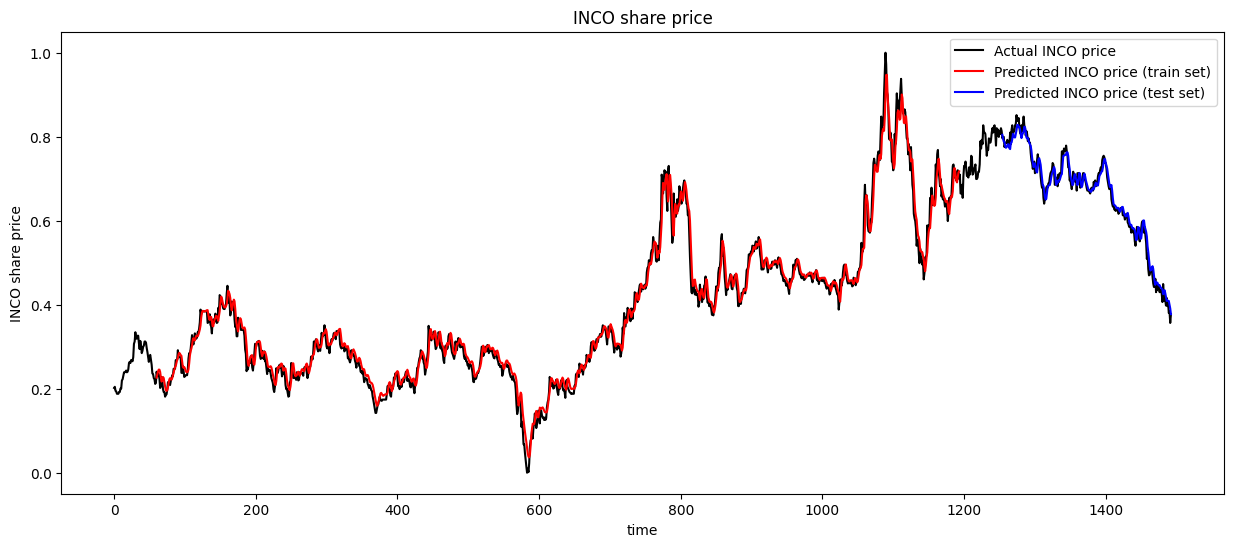

In [55]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [56]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 46ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4172.4921875
Day 2: Predicted Price = 4147.0927734375
Day 3: Predicted Price = 4168.1982421875
Day 4: Predicted Price = 4201.7802734375
Day 5: Predicted Price = 4231.0322265625
Day 6: Predicted Price = 4252.775390625
Day 7: Predicted Price = 4269.3330078125
Day 8: Predicted Price = 4283.50537109375
Day 9: Predicted Price = 4296.9248046875
Day 10: Predicted Price = 4310.15771484375
Day 11: Predicted Price = 4323.24462890625
Day 12: Predicted Price = 4336.1044921875
Day 13: Predicted Price = 4348.7001953125
Day 14: Predicted Price = 4361.05908203125
Day 15: Predicted Price = 4373.23779296875
Day 16: Predicted Price = 4385.2939453125
Day 17: Predicted Price = 4397.271484375
Day 18: Predicted Price = 4409.1982421875
Day 19: Predicted Price = 4421.09228515625
Day 20: Predicted Price = 4432.96240234375
Day 21: Predicted Price = 4444.81396484375
Day 22: Predicted Price = 4456.6508789

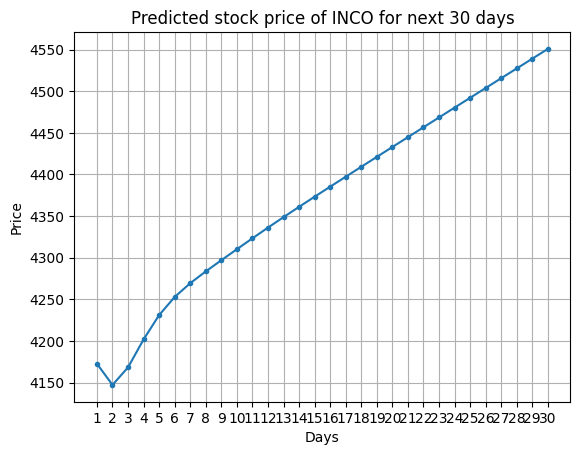

In [57]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [58]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 23ms/step - loss: 2.9857e-04
Validation Loss: 0.00029857151093892753
Validation MSE Loss: 0.00029857151093892753


In [59]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.02348389437293068
Testing RMSE: 0.01727922245215159


batchsize = 128

In [60]:
checkpoints = ModelCheckpoint(filepath= 'inco.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=128,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
9/9 [==============================] - 1s 141ms/step - loss: 0.0016 - val_loss: 3.3898e-04
Epoch 2/125
9/9 [==============================] - 1s 153ms/step - loss: 0.0016 - val_loss: 3.8597e-04
Epoch 3/125
9/9 [==============================] - 1s 145ms/step - loss: 0.0017 - val_loss: 4.4565e-04
Epoch 4/125
9/9 [==============================] - 1s 137ms/step - loss: 0.0020 - val_loss: 5.3684e-04
Epoch 5/125
9/9 [==============================] - 1s 133ms/step - loss: 0.0018 - val_loss: 3.0774e-04
Epoch 6/125
9/9 [==============================] - 1s 137ms/step - loss: 0.0018 - val_loss: 3.9351e-04
Epoch 7/125
9/9 [==============================] - 21s 3s/step - loss: 0.0019 - val_loss: 3.7847e-04
Epoch 8/125
9/9 [==============================] - 7s 590ms/step - loss: 0.0019 - val_loss: 3.9057e-04
Epoch 9/125
9/9 [==============================] - 1s 119ms/step - loss: 0.0016 - val_loss: 3.5840e-04
Epoch 10/125
9/9 [==============================] - 1s 108ms/step - loss: 0

In [61]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 20ms/step


In [62]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [63]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.0231295354249886
0.017542434195491216


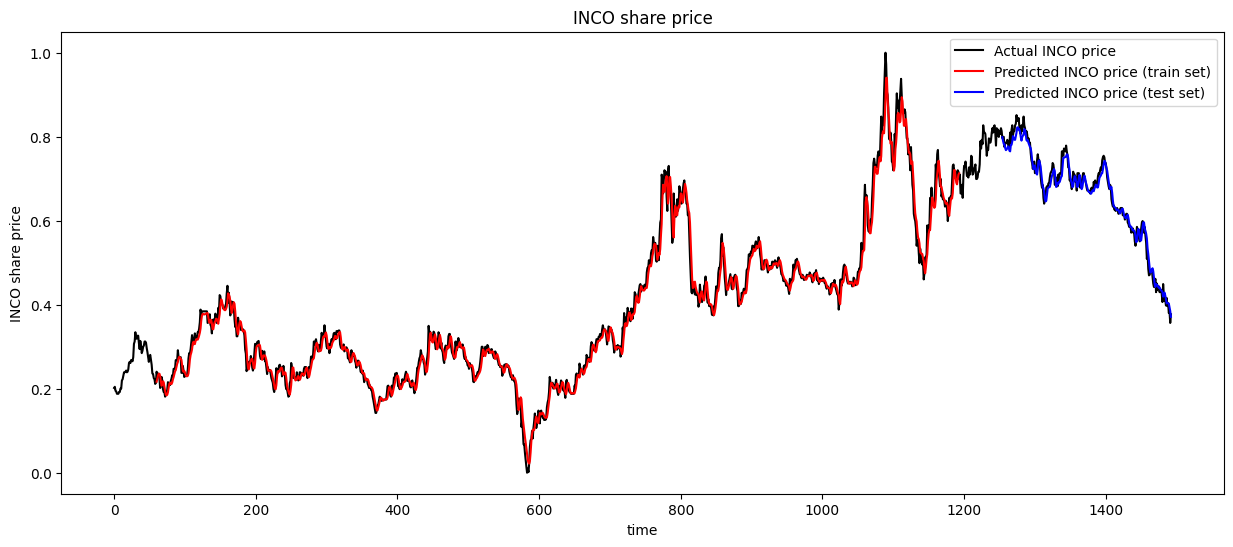

In [64]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual INCO price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted INCO price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted INCO price (test set)")

plt.title(f"INCO share price")
plt.xlabel("time")
plt.ylabel(f"INCO share price")
plt.legend()
plt.show()

In [65]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 34ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 4126.49853515625
Day 2: Predicted Price = 4084.1142578125
Day 3: Predicted Price = 4079.227294921875
Day 4: Predicted Price = 4085.090576171875
Day 5: Predicted Price = 4088.22900390625
Day 6: Predicted Price = 4085.851318359375
Day 7: Predicted Price = 4079.556884765625
Day 8: Predicted Price = 4071.417724609375
Day 9: Predicted Price = 4062.668212890625
Day 10: Predicted Price = 4053.75244140625
Day 11: Predicted Price = 4044.7138671875
Day 12: Predicted Price = 4035.498046875
Day 13: Predicted Price = 4026.074951171875
Day 14: Predicted Price = 4016.46142578125
Day 15: Predicted Price = 4006.697265625
Day 16: Predicted Price = 3996.8251953125
Day 17: Predicted Price = 3986.878173828125
Day 18: Predicted Price = 3976.880859375
Day 19: Predicted Price = 3966.8466796875
Day 20: Predicted Price = 3956.786865234375
Day 21: Predicted Price = 3946.705810546875
Day 22: Predicted Pr

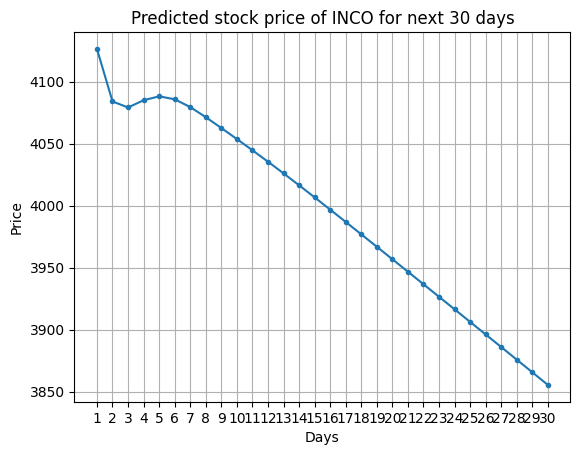

In [66]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of INCO for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [67]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



8/8 [==============================] - 0s 23ms/step - loss: 3.0774e-04
Validation Loss: 0.00030773700564168394
Validation MSE Loss: 0.00030773700564168394


In [68]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.0231295354249886
Testing RMSE: 0.017542434195491216
